# **EDA**

#### **Install Required Libraries**
* pip install pandas numpy

## **Loading and Inspecting the Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./data/synthetic_fraud_ontario.csv')

# Display first few rows
df.head()


,fraud_id,fraud_type,location,date_reported,amount_loss,reported_by,age,channel,is_preventable,fraud_detected_at,risk_score
0,FRAUD-8542623,Payment Fraud,Ontario,2024-04-20,2862.55,employer,38,phone,True,Initiation,0.44
1,FRAUD-4829236,Payment Fraud,Ontario,2024-07-02,4437.51,victim,56,email,False,Initiation,0.50
2,FRAUD-2436887,Payment Fraud,Ontario,2023-08-23,2982.91,police,55,phone,True,Initiation,0.29
3,FRAUD-1250939,Payment Fraud,Ontario,2024-06-04,4168.37,victim,56,phone,True,Completion,0.56
4,FRAUD-1635556,Payment Fraud,Ontario,2024-05-02,2555.26,victim,75,in-person,False,Processing,0.24


## **Dataset Overview**




In [2]:
# View dataset structure and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43680 entries, 0 to 43679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fraud_id           43680 non-null  object 
 1   fraud_type         43680 non-null  object 
 2   location           43680 non-null  object 
 3   date_reported      43680 non-null  object 
 4   amount_loss        43680 non-null  float64
 5   reported_by        43680 non-null  object 
 6   age                43680 non-null  int64  
 7   channel            43680 non-null  object 
 8   is_preventable     43680 non-null  bool   
 9   fraud_detected_at  43680 non-null  object 
 10  risk_score         43680 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 3.4+ MB


## **Summary Statistics**

In [3]:
# Summary statistics for numerical columns
df.describe()


,amount_loss,age,risk_score
count,43680.000000,43680.000000,43680.000000
mean,8724.876212,49.068063,0.576097
std,11582.982106,18.193678,0.216174
min,20.500000,18.000000,0.200000
25%,1319.485000,33.000000,0.390000
50%,4089.550000,49.000000,0.580000
75%,9714.110000,65.000000,0.760000
max,49990.160000,80.000000,0.950000


## **Visualizing Fraud Distribution**

#### **Install Required Libraries**
* pip install matplotlib seaborn

C:\Users\Owner\AppData\Local\Temp\ipykernel_39180\2820475008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraud_type', order=df['fraud_type'].value_counts().index, palette='Set2')


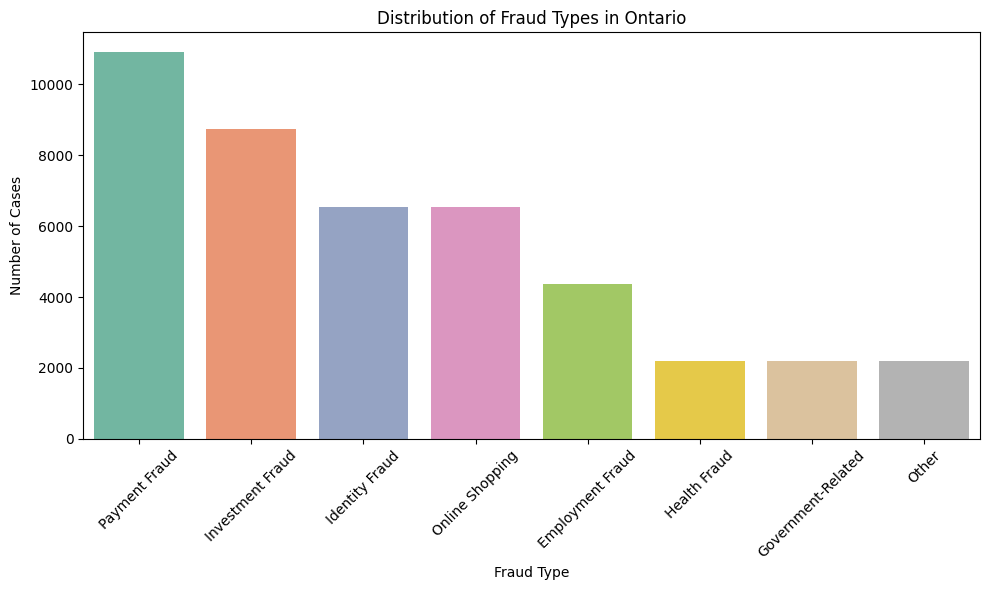

In [4]:
# Distribution of Fraud Types - Aligned with Step-1
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fraud_type', order=df['fraud_type'].value_counts().index, palette='Set2')
plt.title('Distribution of Fraud Types in Ontario')
plt.ylabel('Number of Cases')
plt.xlabel('Fraud Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Average Financial Loss by Fraud Type**

In [5]:
# Mean amount lost by fraud type
df.groupby('fraud_type')['amount_loss'].mean().sort_values(ascending=False)


fraud_type
Investment Fraud      27584.326391
Government-Related    10335.859702
Employment Fraud       8049.357946
Identity Fraud         5231.439321
Health Fraud           5182.754739
Other                  2569.101625
Payment Fraud          2550.498021
Online Shopping         508.992886
Name: amount_loss, dtype: float64

## **Chi-Square Test for Independence**

#### **Install Required Libraries**
* pip install matplotlib seaborn

In [7]:
import scipy.stats as stats

# Chi-Square Test between fraud type and preventability
contingency = pd.crosstab(df['fraud_type'], df['is_preventable'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-Square Statistic:", round(chi2, 2))
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("Reject Null Hypothesis: Fraud preventability is dependent on fraud type.")
else:
    print("Fail to Reject Null Hypothesis: Fraud preventability is not dependent on fraud type.")


Chi-Square Statistic: 10.91
p-value: 0.1424678025544039
Degrees of Freedom: 7
Fail to Reject Null Hypothesis: Fraud preventability is not dependent on fraud type.


### **Hypothesis Formulation:**
- **H₀ (Null Hypothesis):** Fraud preventability is independent of fraud type.  
- **H₁ (Alternative Hypothesis):** Fraud preventability is dependent on fraud type.
### **Results:**
- **Chi-Square Statistic:** 10.91  
- **P-Value:** 0.1425  
- **Degrees of Freedom:** 7  
- **Decision:** Fail to Reject H₀

### **Conclusion:**
- The test indicates **no statistically significant relationship** between the type of fraud and whether it is preventable.
- This implies that **fraud preventability is not strongly influenced by the fraud category** itself.
- Regardless of whether the case is **payment fraud, identity theft, or investment fraud**, the chances of prevention appear relatively consistent across types.
- Future models should explore **other variables** such as transaction stage, authentication level, or system architecture for targeting preventable cases more effectively.


## 🔍 **Key Insights from EDA**

- **Total Number of Fraud Cases in Ontario:** `43,680`  
  This directly supports the current state defined in **Step 1** of TBP: Ontario experiences the highest number of fraud cases in Canada.

- **Top Fraud Types by Volume:**
  - **Payment Fraud:** 10,920 cases
  - **Investment Fraud:** 8,736 cases
  - **Identity Fraud & Online Shopping:** 6,552 cases each
  - Other fraud types such as Employment, Health, Government-Related, and Miscellaneous make up smaller but still notable proportions.

- **Fraud Loss Amounts by Type (Average):**
  - **Investment Fraud** leads in financial damage with an average loss of **$27,584**.
  - **Government-Related** and **Employment Fraud** also show high average losses: **$10,335** and **$8,049** respectively.
  - Surprisingly, **Payment Fraud**, despite its high frequency, shows **lower average financial loss** (~$2,550), suggesting smaller but more frequent transactions.

- **Descriptive Statistics Across Dataset:**
  - **Average Transaction Loss:** $8,724 (min: $20.5, max: ~$49,990)
  - **Age of Victims:** Ranges from 18 to 80, with a mean age of ~49 years.
  - **Risk Scores:** Centered around 0.58, indicating moderately high-risk detection trends.
  
- **Fraud Channels:**  
  Fraud incidents were reported through various channels, with **phone and email** being the most commonly exploited vectors.


## **Hypothesis Testing: Fraud Type vs Preventability**

### **Hypothesis Formulation:**
- **H₀ (Null Hypothesis):** Fraud preventability is independent of fraud type.  
- **H₁ (Alternative Hypothesis):** Fraud preventability is dependent on fraud type.

### **Test Results:**
- **Chi-Square Statistic:** 10.91  
- **P-Value:** 0.1425  
- **Degrees of Freedom:** 7  
- **Decision:** Fail to Reject H₀

### **Conclusion:**
- There is **no statistically significant relationship** between the fraud type and whether or not it was preventable.
- This implies that **fraud prevention does not vary significantly** based on the type of fraud.
- Future fraud detection improvements may need to focus on **transaction behavior**, **risk score patterns**, or **real-time detection timing**, rather than categorization by fraud type alone.

